In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [34]:
# reading data from the datasets
X = []
Y = []


# make this a function for both testing and training data folders

categorical_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in categorical_labels:
    path = os.path.join('C:/Users/yadav/Downloads/brain_tumor_data/Training', i)
    for dir in os.listdir(path):
        image = cv2.imread(os.path.join(path, dir))
        image = cv2.resize(image, (150, 150))
        X.append(image)
        Y.append(i)

for i in categorical_labels:
    path = os.path.join('C:/Users/yadav/Downloads/brain_tumor_data/Testing', i)
    for dir in os.listdir(path):
        image = cv2.imread(os.path.join(path, dir))
        image = cv2.resize(image, (150, 150))
        X.append(image)
        Y.append(i)

In [35]:
from keras.preprocessing import image
img_tensor = image.img_to_array(X[0])
print(img_tensor.shape)

(150, 150, 3)


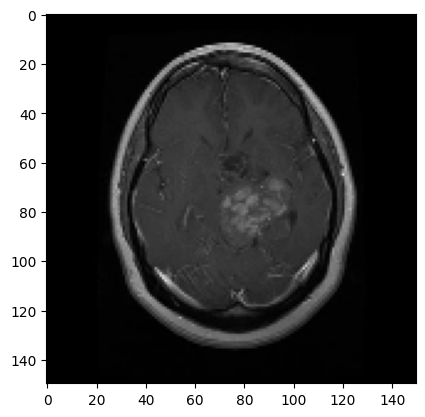

In [36]:
X = np.array(X)
Y = np.array(Y)

plt.imshow(X[0], cmap=plt.cm.binary)
plt.show()

In [37]:
# shuffling the datasets
X = shuffle(X)
Y = shuffle(Y)

In [38]:
# total, dimensions, rgb
X.shape

(3264, 150, 150, 3)

In [39]:
# just the total num of labels
Y.shape

(3264,)

In [40]:
# splitting train, test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=5)

In [41]:
# the Y dataset contains categories instead of numerical values

y_numerical = []
# the categories have indices 0 - 3
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


for i in y_train:
    y_numerical.append(categorical_labels.index(i))

y_train = y_numerical
print(y_train)

[0, 3, 2, 1, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 1, 1, 3, 3, 3, 1, 2, 1, 3, 3, 3, 1, 0, 1, 1, 3, 0, 3, 1, 1, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 3, 2, 3, 1, 1, 0, 0, 0, 1, 2, 3, 3, 0, 3, 1, 1, 2, 2, 0, 0, 3, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 3, 1, 3, 0, 1, 2, 1, 2, 1, 0, 3, 0, 3, 0, 1, 1, 0, 1, 3, 1, 0, 3, 1, 2, 3, 0, 1, 1, 3, 0, 3, 3, 0, 2, 3, 1, 0, 2, 1, 0, 0, 2, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 3, 3, 3, 3, 0, 3, 1, 2, 2, 0, 1, 3, 3, 3, 3, 3, 1, 0, 1, 3, 2, 1, 3, 0, 0, 3, 3, 0, 1, 3, 0, 3, 2, 1, 1, 2, 1, 1, 1, 2, 3, 2, 0, 0, 1, 0, 1, 3, 0, 1, 0, 3, 3, 3, 3, 0, 1, 1, 3, 1, 2, 0, 3, 0, 1, 3, 0, 1, 3, 3, 1, 1, 1, 2, 1, 0, 2, 0, 3, 2, 1, 1, 3, 1, 1, 3, 0, 1, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 1, 3, 0, 1, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 1, 1, 3, 0, 2, 3, 1, 2, 3, 3, 2, 1, 0, 0, 1, 1, 0, 3, 0, 3, 1, 2, 1, 0, 2, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2, 1, 0, 0, 3, 1, 1, 0, 3, 2, 3, 1, 2, 1, 1, 3, 3, 1, 0, 3, 2, 1, 3, 0, 1, 3, 3, 0, 2, 3, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 3, 3, 0, 

In [42]:
y_train = tf.keras.utils.to_categorical(y_numerical)

In [43]:
y_train

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [44]:
# now our y_train data is numerical in terms of categorical vectors, 
# we also need to apply this transformation to the y_test data

y_test_numerical = []

for i in y_test:
    y_test_numerical.append(categorical_labels.index(i))

y_test = y_test_numerical
y_test = tf.keras.utils.to_categorical(y_test)

In [45]:
# we can now begin to train a model since all our data is all numerical
X_train.shape

(2937, 150, 150, 3)

In [46]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='softmax'),
#     tf.keras.layers.Dense(128, activation='softmax'),
#     tf.keras.layers.Dense(128, activation='softmax'),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(4, activation='softmax')
# ])

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_15 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [48]:
#model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [49]:
# training the model
model.fit(X_train, y_train, epochs = 10, validation_split=0.1)

Epoch 1/10
83/83 [==============================] - 96s 1s/step - loss: 1.7232 - accuracy: 0.2792 - val_loss: 1.3683 - val_accuracy: 0.2653
Epoch 2/10
83/83 [==============================] - 92s 1s/step - loss: 1.3595 - accuracy: 0.2751 - val_loss: 1.3675 - val_accuracy: 0.2823
Epoch 3/10
83/83 [==============================] - 91s 1s/step - loss: 1.3600 - accuracy: 0.2804 - val_loss: 1.3676 - val_accuracy: 0.2823
Epoch 4/10
83/83 [==============================] - 96s 1s/step - loss: 1.3601 - accuracy: 0.2917 - val_loss: 1.3684 - val_accuracy: 0.2823
Epoch 5/10
83/83 [==============================] - 118s 1s/step - loss: 1.3584 - accuracy: 0.2841 - val_loss: 1.3682 - val_accuracy: 0.2823
Epoch 6/10
83/83 [==============================] - 132s 2s/step - loss: 1.3588 - accuracy: 0.2758 - val_loss: 1.3695 - val_accuracy: 0.2823
Epoch 7/10
83/83 [==============================] - 223s 3s/step - loss: 1.3589 - accuracy: 0.2902 - val_loss: 1.3702 - val_accuracy: 0.2823
Epoch 8/10
83/83 

In [ ]:
# gives 65% accuracy
# model = Sequential()
# model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Flatten())b
# model.add(Dense(4,activation='softmax'))

In [30]:
y_pred = model.predict(X_test)

11/11 [==============================] - 2s 110ms/step


In [32]:
from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

11/11 [==============================] - 1s 102ms/step - loss: 1.6783 - accuracy: 0.3211
